In [1]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
ratemaps= np.load('../data/activations512.npy')

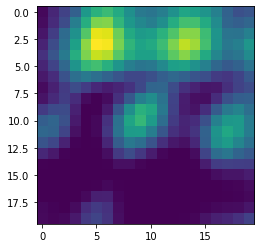

In [3]:
idx = 0
plt.imshow(ratemaps[idx])

In [4]:
def my_calculate_sac(rm,mask=1):
    
    #define sac dim
    l = int(rm.shape[0]*mask)
    sac = np.zeros((l-1,l-1))
    sh = (l-1)//2
    
    for i in range(-sh,sh+1):
        for j in range(-sh,sh+1):
            #shift ratemap
            shift = np.roll(np.roll(rm,i,axis=0),j,axis=1)
            
            #get row and column to remove
            if i == 0:
                sx = slice(None)
            elif i > 0:
                sx = slice(i,None)
            else:
                sx = slice(None,i)
            if j == 0:
                sy = slice(None)
            elif j > 0:
                sy = slice(j,None)
            else:
                sy = slice(None,j)
                
            rmr = rm[sx,sy]
            shiftr = shift[sx,sy]
            
            #calculate pearson correlation coefficient between flatten matrix
            rmf = np.ndarray.flatten(rmr)
            shiftf = np.ndarray.flatten(shiftr)
            
            pr = pearsonr(rmf,shiftf)
            
            sac[(l-1)//2+i,(l-1)//2+j]=pr[0]

    return sac

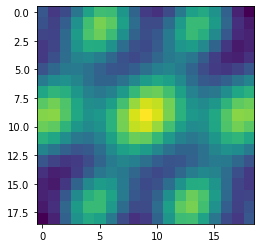

In [5]:
sac = my_calculate_sac(ratemaps[0],mask=1)
plt.imshow(sac)